## Load library and data

In [ ]:
import os
import sys
print(os.getcwd())

In [ ]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [3]:
import scanpy as sc

In [12]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import scvelo as scv
import loompy as lp
from scipy import sparse
import anndata
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt
import umap.umap_ as umap
import seaborn as sns
import celltypist
from celltypist import models

%load_ext autoreload
%autoreload 2
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
gp.__version__
from gseapy import barplot, dotplot

import plotnine as p9
import liana as li
import decoupler as dc
import omnipath as op
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

sc.settings.set_figure_params(dpi=100)
matplotlib.style.use('default')  
rcParams['font.family'] = 'Nimbus Sans'
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

scanpy==1.9.1 anndata==0.7.8 umap==0.5.3 numpy==1.23.4 scipy==1.10.1 pandas==1.4.1 scikit-learn==1.2.2 statsmodels==0.14.2 python-igraph==0.9.6 pynndescent==0.5.4


In [15]:
cluster_col_dic = {'EP1-NAPSA':'#298a4e','EP2-MALAT1':'#c93838','EP3-SFTPD':'#ff7f0e','EP4-HYDIN':'#5B9790','EP5-MUC5B':'#8070F7','EP6-CAPS':'#a052c7','EP7-KRT5':'#2a2a80','EP8-VIM':'#0b7ee3','EP9-AGER':'#a5b6c7','EP10-TOP2A':'#e0b20b',
                   'FB1-POSTN':'#1f77b4','FB2-CXCL12':'#00c0d4','FB3-RGS5':'#6173bd','FB4-MYH11':'#aa40fc','FB5-SRGN':'#ad8624','FB6-CD74':'#b5bd61','FB7-SLPI':'#9a9ca6',
                   'CD8-C1-GZMK':'#ffe119', 'CD8-C2-ZNF683':'#4363d8', 'CD8-C3-CX3CR1':'#911eb4', 'CD8-C4-SLC4A10':'#f032e6', 'CD8-C5-ISG15':'#addd8e',
                   'CD4-C1-ANXA1':'#fabed4', 'CD4-C2-TCF7':'#825841', 'CD4-C3-MALAT1':'#1f78b4', 'Treg-FOXP3':'#fed976', 'NK-C1-FCGR3A':'#ada390', 'NK-C2-IL2RB':'#91b5b5',
                   'BC1-ITGB1':'#a8727b','BC2-TNFSF9':'#8ca88f','BC3-IGHD':'#e2224B','BC4-RGS13':'#fed1b9','BC5-S100A6':'#119eb9','PLASMA-JCHAIN':'#67d1f8','MAST-KIT':'#000075',
                   'MAC1-SELENOP':'#898112','MAC2-TYROBP':'#70c47b','MAC3-SPP1':'#055e35','MAC4-FABP4':'#9A6324','MAC5-S100A8':'#fffac8','MAC6-MKI67':'#800000','MAC7-PLXDC2':'#aaffc3',
                   'MONO-FCN1':'#a9a9a9','DC1-CD14':'#59c9c2','DC2-CD1C':'#f781bf','DC3-LILRA4':'#060404','DC4-LAMP3':'#ba79b0','DC5-XCR1':'#52401d','DC6-CD1A':'#e31a1c',
                   'EC1-NOTCH4':'#469990','EC2-CCL14':'#c4aae6','EC3-ACKR1':'#3491d1','EC4-CA4':'#7fcdbb','EC5-COL1A2':'#dba616','EC6-PTMA':'#aec7e8','EC7-CXCR4':'#8ba14a','EC8-CCL21':'#e8810c','EC9-LYZ':'#965373','EC10-GJA5':'#6d67bf','EC11-KRT19':'#3cb44b'}

In [8]:
NORA = sc.read("/home/sujin/NORA_TOTAL_ANNOTATION.h5ad")
NORA

AnnData object with n_obs × n_vars = 252339 × 33332
    obs: 'sample_num', 'cell', 'sample_id', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_types', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'rNumber', 'TKI', 'Response', 'Stage', 'EGFR_mutation', 'visible_tumor', 'MPR_type', 'TKI_MPR', 'T-stage', 'predicted.annotation.l2.score', 'predicted.annotation.l2', 'mapping.score', 'basic annotation', 'cnv_leiden', 'cnv_score', 'Annotation'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'chromosome', 'start', 'end'
    uns: 'cnv', 'cnv_leiden_colors', 'cnv_neighbors', 'leiden'
    obsm: 'X_cnv', 'X_cnv_pca', 'X_cnv_umap', 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspli

In [9]:
set(NORA.obs['basic annotation'])

{'B cells',
 'Endothelial cells',
 'Epithelial cells',
 'Fibroblasts',
 'Mast cells',
 'Myeloid cells',
 'Plasma cells',
 'T/NK cells'}

In [10]:
set(NORA.obs['Annotation'])

{'BC1-ITGB1',
 'BC2-TNFSF9',
 'BC3-IGHD',
 'BC4-RGS13',
 'BC5-S100A6',
 'CD4-C1-ANXA1',
 'CD4-C2-TCF7',
 'CD4-C3-MALAT1',
 'CD8-C1-GZMK',
 'CD8-C2-ZNF683',
 'CD8-C3-CX3CR1',
 'CD8-C4-SLC4A10',
 'CD8-C5-ISG15',
 'DC1-CD14',
 'DC2-CD1C',
 'DC3-LILRA4',
 'DC4-LAMP3',
 'DC5-XCR1',
 'DC6-CD1A',
 'EC1-NOTCH4',
 'EC10-GJA5',
 'EC11-KRT19',
 'EC2-CCL14',
 'EC3-ACKR1',
 'EC4-CA4',
 'EC5-COL1A2',
 'EC6-PTMA',
 'EC7-CXCR4',
 'EC8-CCL21',
 'EC9-LYZ',
 'EP1-NAPSA',
 'EP10-TOP2A',
 'EP2-MALAT1',
 'EP3-SFTPD',
 'EP4-HYDIN',
 'EP5-MUC5B',
 'EP6-CAPS',
 'EP7-KRT5',
 'EP8-VIM',
 'EP9-AGER',
 'FB1-POSTN',
 'FB2-CXCL12',
 'FB3-RGS5',
 'FB4-MYH11',
 'FB5-SRGN',
 'FB6-CD74',
 'FB7-SLPI',
 'MAC1-SELENOP',
 'MAC2-TYROBP',
 'MAC3-SPP1',
 'MAC4-FABP4',
 'MAC5-S100A8',
 'MAC6-MKI67',
 'MAC7-PLXDC2',
 'MAST-KIT',
 'MONO-FCN1',
 'NK-C1-FCGR3A',
 'NK-C2-IL2RB',
 'PLASMA-JCHAIN',
 'Treg-FOXP3'}

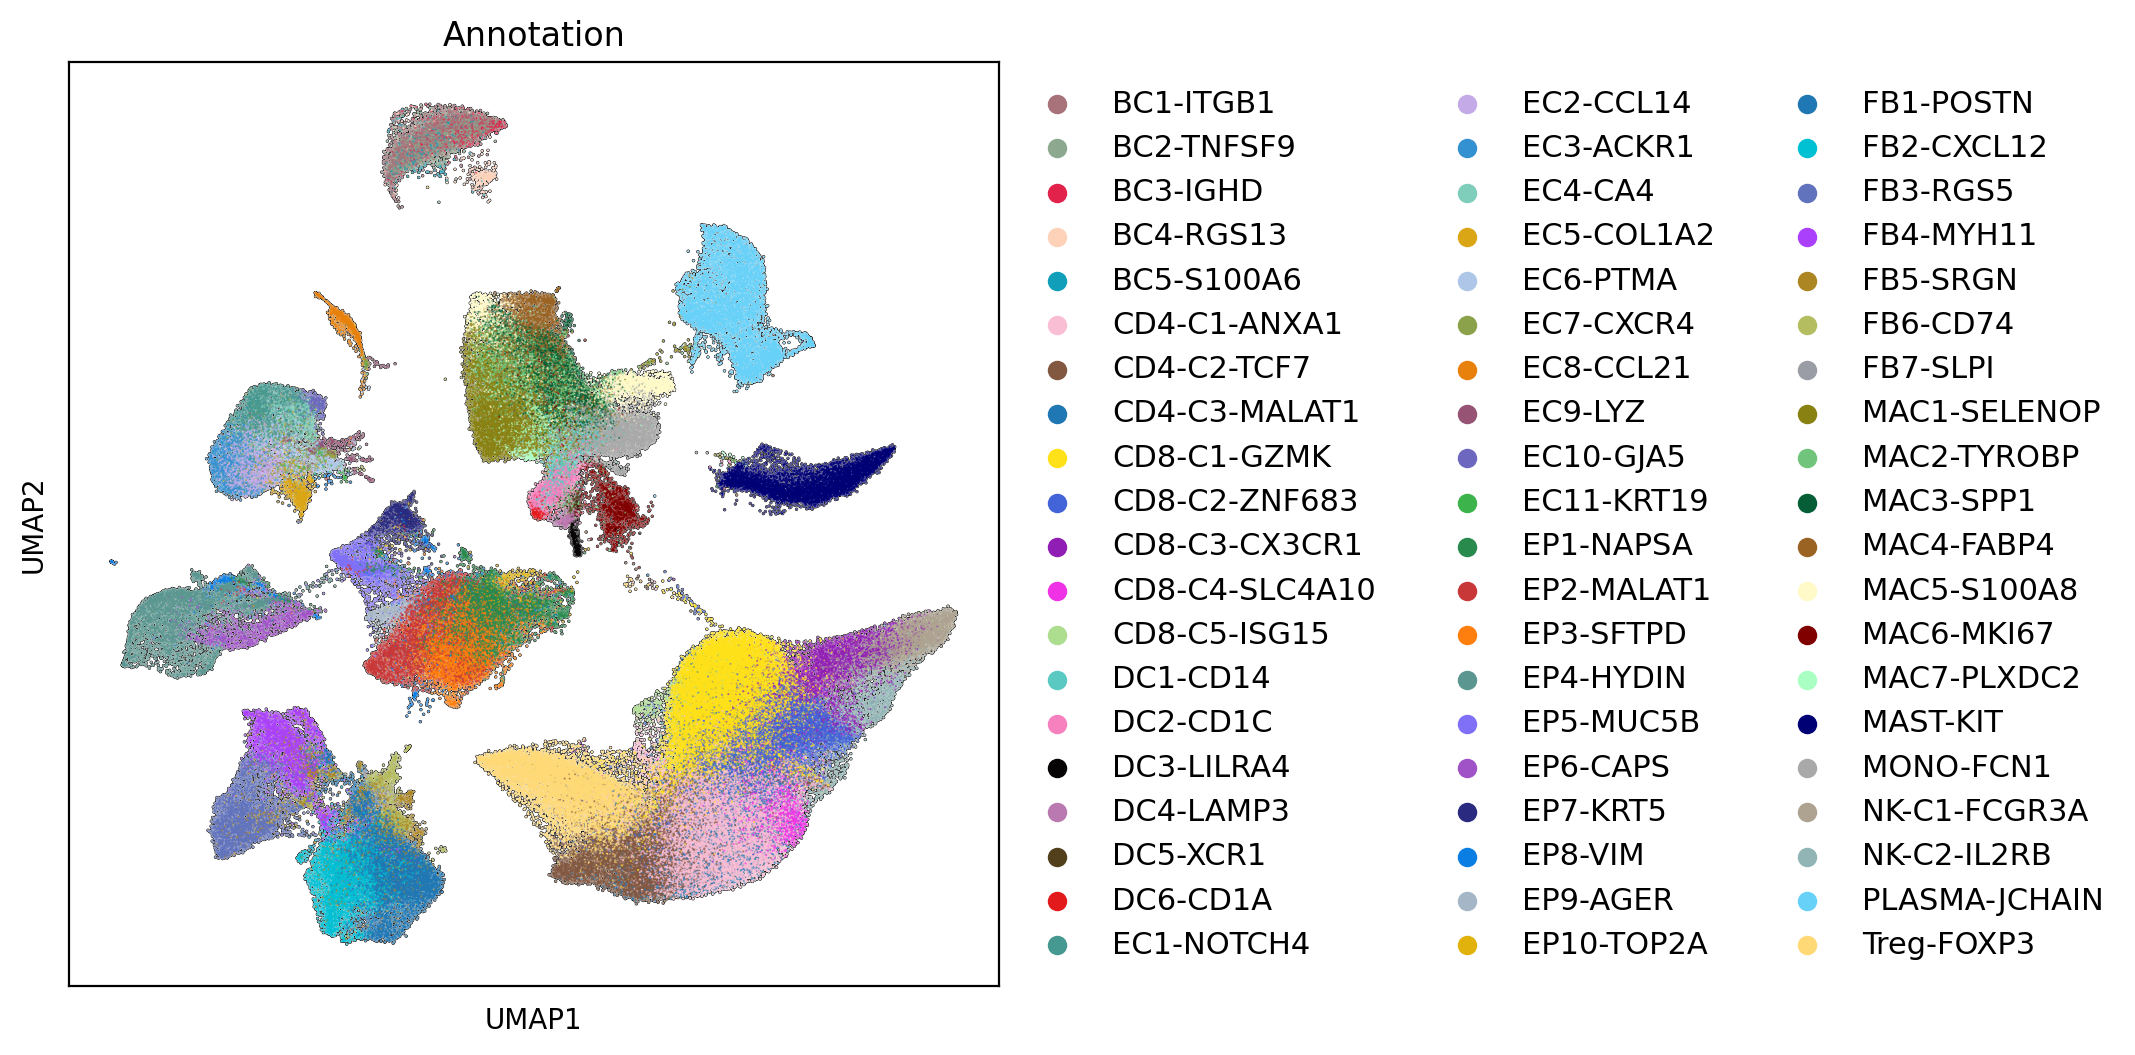

In [41]:
rcParams['figure.figsize'] = (6,6)
sc.pl.umap(NORA, color=['Annotation'], edgecolor='none', size=2, show=True, linewidths=10,legend_fontsize=11,add_outline = True, palette=cluster_col_dic)

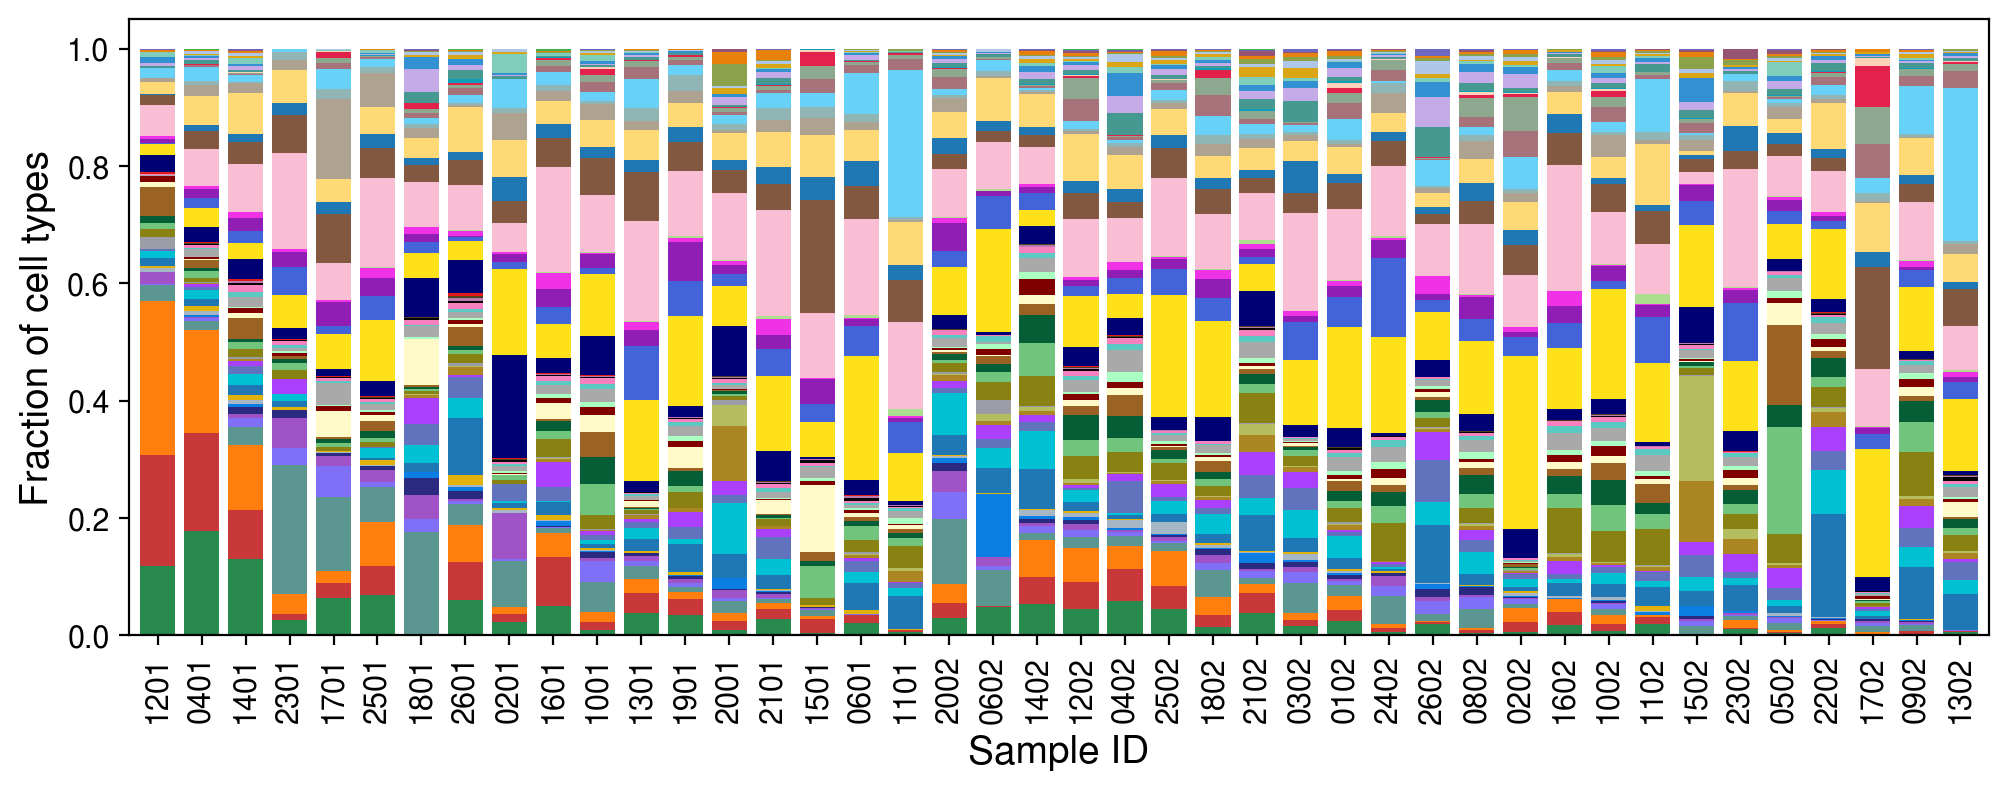

In [59]:
Groups_tab = pd.crosstab(index=NORA.obs['sample_id_split'],columns=NORA.obs['Annotation'], margins=True)
Prop_Tab = Groups_tab.drop(columns="All")
Prop_Tab = Prop_Tab.apply(lambda r: r/r.sum(), axis=1).drop(index="All")
Col_Group = cluster_col_dic
sample_order = ['1201','0401','1401','2301','1701','2501','1801','2601','0201','1601','1001','1301','1901','2001','2101','1501','0601','1101',
                '2002','0602','1402','1202','0402','2502','1802','2102','0302','0102','2402','2602','0802','0202','1602','1002','1102','1502','2302','0502','2202','1702','0902','1302']

cluster_order = ['EP1-NAPSA', 'EP2-MALAT1', 'EP3-SFTPD', 'EP4-HYDIN', 'EP5-MUC5B', 'EP6-CAPS', 'EP7-KRT5', 'EP8-VIM', 'EP9-AGER', 'EP10-TOP2A',
                 'FB1-POSTN', 'FB2-CXCL12', 'FB3-RGS5', 'FB4-MYH11', 'FB5-SRGN', 'FB6-CD74', 'FB7-SLPI',
                 'MAC1-SELENOP', 'MAC2-TYROBP', 'MAC3-SPP1', 'MAC4-FABP4', 'MAC5-S100A8', 'MAC6-MKI67', 'MAC7-PLXDC2', 'MONO-FCN1',
                 'DC1-CD14', 'DC2-CD1C', 'DC3-LILRA4', 'DC4-LAMP3', 'DC5-XCR1', 'DC6-CD1A', 'MAST-KIT', 
                 'CD8-C1-GZMK', 'CD8-C2-ZNF683', 'CD8-C3-CX3CR1', 'CD8-C4-SLC4A10', 'CD8-C5-ISG15',
                 'CD4-C1-ANXA1', 'CD4-C2-TCF7', 'CD4-C3-MALAT1', 'Treg-FOXP3', 'NK-C1-FCGR3A', 'NK-C2-IL2RB', 'PLASMA-JCHAIN',
                 'BC1-ITGB1', 'BC2-TNFSF9', 'BC3-IGHD', 'BC4-RGS13', 'BC5-S100A6',
                 'EC1-NOTCH4', 'EC2-CCL14', 'EC3-ACKR1', 'EC4-CA4', 'EC5-COL1A2', 'EC6-PTMA', 'EC7-CXCR4', 'EC8-CCL21', 'EC9-LYZ', 'EC10-GJA5', 'EC11-KRT19']

Prop_Tab = Prop_Tab.loc[sample_order,cluster_order]
matplotlib.style.use('default') 
rcParams['font.family'] = 'Nimbus Sans'

Prop_Tab.plot(kind="bar",
            figsize=(12,4),
            stacked=True, 
            linewidth=1, 
            width=0.8, fontsize=11, color=Col_Group)
            
plt.ylabel("Fraction of cell types", fontsize=14)
plt.xlabel("Sample ID", fontsize=14)
plt.ylim=1.0
plt.legend().set_visible(False)
plt.show()

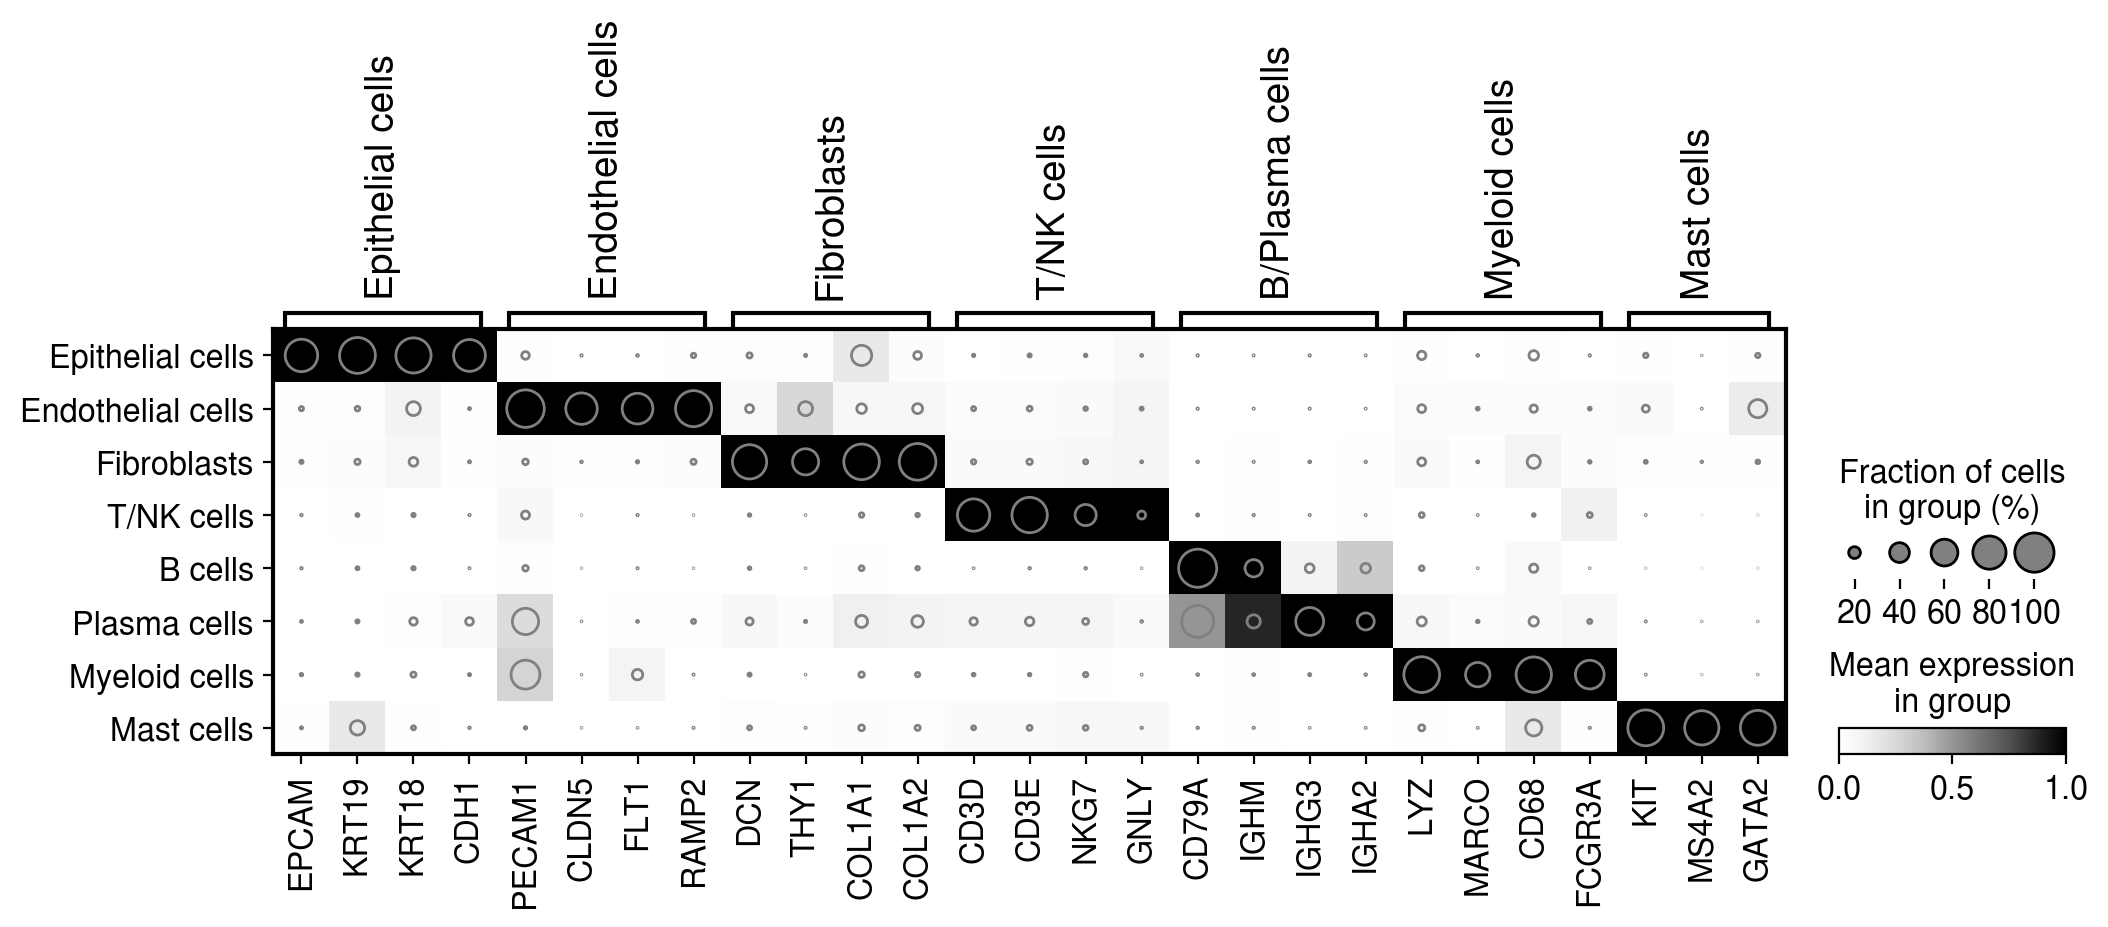

In [78]:
total_gene_set =  {
    'Epithelial cells':['EPCAM','KRT19','KRT18','CDH1'],
    'Endothelial cells':['PECAM1','CLDN5','FLT1','RAMP2'],
    'Fibroblasts':['DCN','THY1','COL1A1','COL1A2'],
    'T/NK cells':['CD3D','CD3E','NKG7','GNLY'],
    'B/Plasma cells':['CD79A','IGHM','IGHG3','IGHA2'],
    'Myeloid cells':['LYZ','MARCO','CD68','FCGR3A'],
    'Mast cells':['KIT','MS4A2','GATA2']
}

sc.settings.set_figure_params(dpi=100)
plot = sc.pl.dotplot(NORA,
        total_gene_set,
        'basic annotation',
        categories_order = ['Epithelial cells', 'Endothelial cells', 'Fibroblasts', 'T/NK cells', 'B cells','Plasma cells','Myeloid cells','Mast cells'],
        standard_scale = "var",
        dot_max = 1, return_fig=True)
plot.style(dot_edge_color='grey', dot_edge_lw=1, cmap='Greys',color_on = 'square').show()

In [268]:
Groups_tab = pd.crosstab(index=NORA.obs['TKI'],columns=NORA.obs['basic annotation'], margins=True)
Prop_cluster_Tab = Groups_tab.drop(columns="All")
Prop_cluster_Tab = Prop_cluster_Tab.apply(lambda r: r/r.sum(), axis=1).drop(index="All")
basic_cluster_order = ['Epithelial cells', 'Fibroblasts','Myeloid cells', 'Endothelial cells','Mast cells','T/NK cells', 'B cells','Plasma cells']
Prop_cluster_Tab = Prop_cluster_Tab.loc[['Pre','Post'],basic_cluster_order]
Prop_cluster_Tab

basic annotation,Epithelial cells,Fibroblasts,Myeloid cells,Endothelial cells,Mast cells,T/NK cells,B cells,Plasma cells
TKI,,,,,,,,
Pre,0.203772,0.091213,0.120011,0.029661,0.033467,0.444004,0.025165,0.052707
Post,0.106751,0.134451,0.166007,0.061950,0.028781,0.428530,0.040420,0.033110


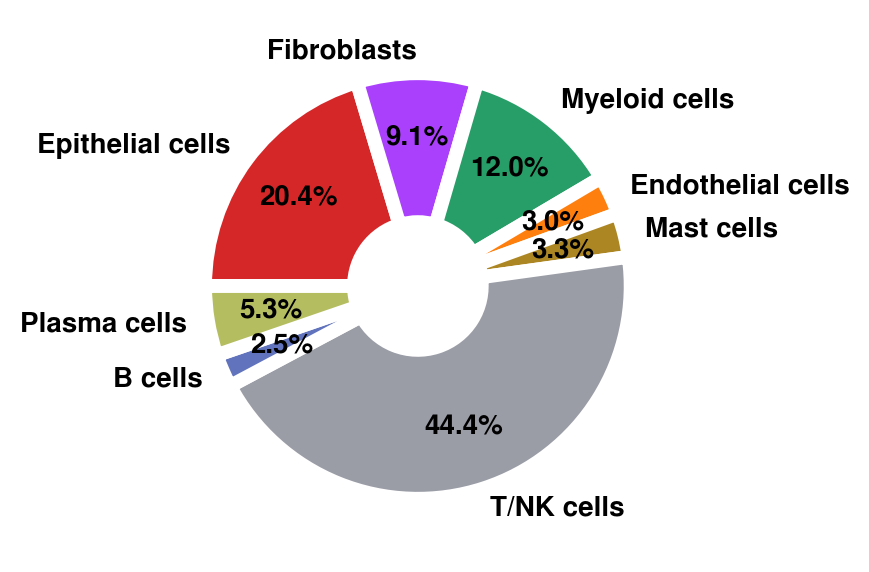

In [273]:
## PRE - basic cluster proportion
ratio = Prop_cluster_Tab.iloc[0].to_list()
labels = Prop_cluster_Tab.columns.to_list()
colors = [ '#d62728', '#aa40fc','#279e68','#ff7f0e', '#ad8624', '#9a9ca6', '#6173bd','#b5bd61']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', pctdistance=0.7, startangle=180, counterclock=False, colors=colors, wedgeprops=wedgeprops,textprops={'fontweight':'bold','fontsize': 10})
plt.show()

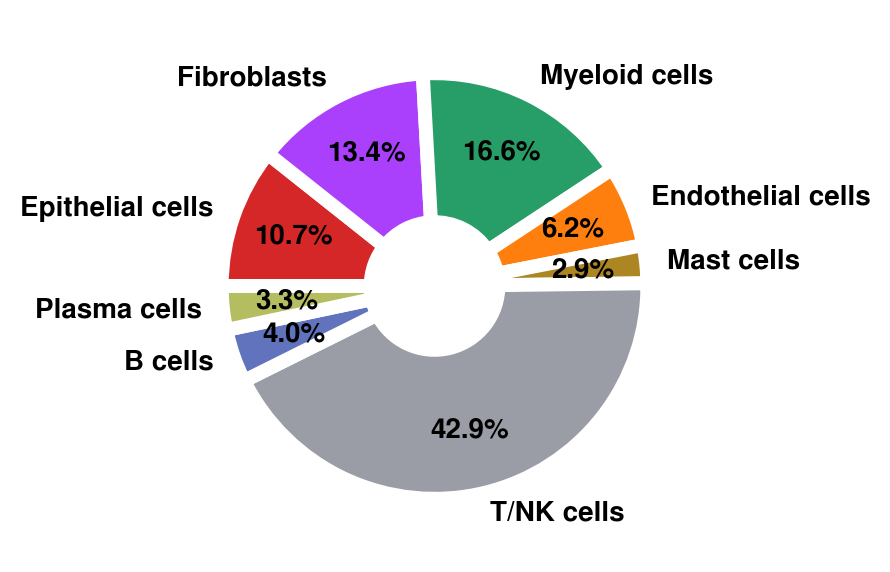

In [274]:
## POST - basic cluster proportion
ratio = Prop_cluster_Tab.iloc[1].to_list()
labels = Prop_cluster_Tab.columns.to_list()
colors = [ '#d62728', '#aa40fc','#279e68','#ff7f0e', '#ad8624', '#9a9ca6', '#6173bd','#b5bd61']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', pctdistance=0.7, startangle=180, counterclock=False, colors=colors, wedgeprops=wedgeprops,textprops={'fontweight':'bold','fontsize': 10})
plt.show()

In [85]:
post_enr_cluster_list = ['EP5-MUC5B','EP8-VIM','EP9-AGER','FB6-CD74','MAC1-SELENOP','MAC3-SPP1','MAC7-PLXDC2','CD8-C1-GZMK','EC9-LYZ']
NORA_post_enr = NORA[NORA.obs['Annotation'].isin(post_enr_cluster_list)]
NORA_post_enr

View of AnnData object with n_obs × n_vars = 49275 × 33332
    obs: 'sample_num', 'cell', 'sample_id', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_types', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'TKI', 'Response', 'Stage', 'EGFR_mutation', 'MPR_type', 'TKI_MPR', 'T-stage', 'predicted.annotation.l2.score', 'predicted.annotation.l2', 'mapping.score', 'basic annotation', 'cnv_leiden', 'cnv_score', 'Annotation', 'sample_id_split'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'chromosome', 'start', 'end'
    uns: 'cnv', 'cnv_leiden_colors', 'cnv_neighbors', 'leiden', 'Annotation_colors'
    obsm: 'X_cnv', 'X_cnv_pca', 'X_cnv_umap', 'X_umap'
    layers: 'ambiguous', 'matrix',

In [86]:
NORA_pre = NORA_post_enr[NORA_post_enr.obs['TKI'] == "Pre"]
NORA_post = NORA_post_enr[NORA_post_enr.obs['TKI'] == "Post"]

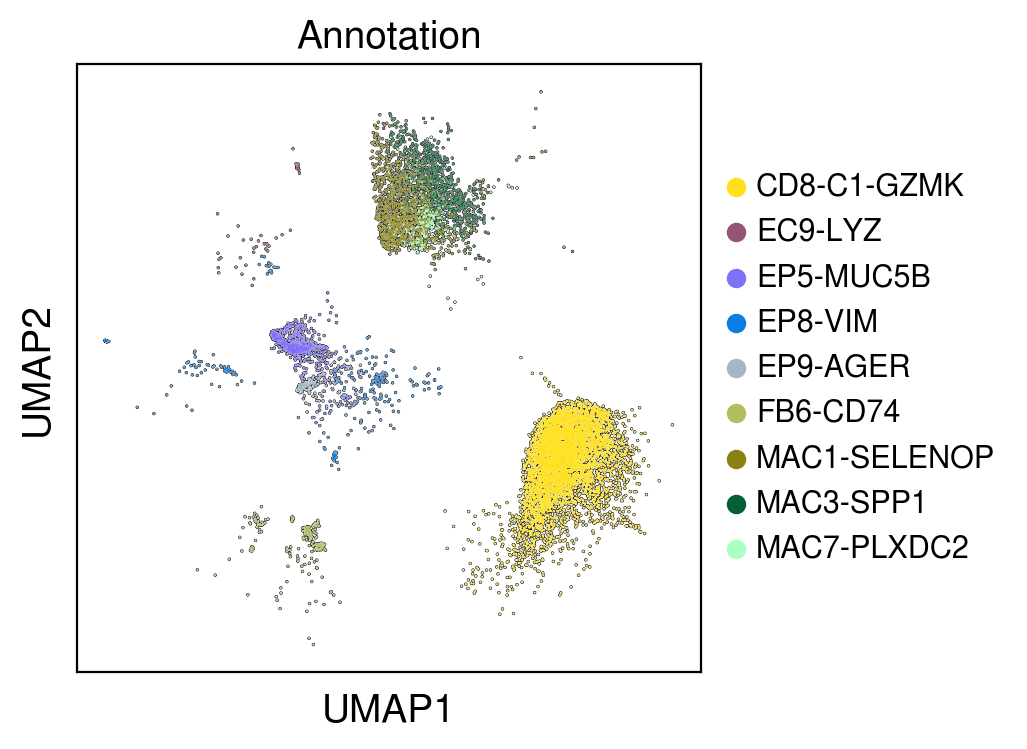

In [89]:
rcParams['figure.figsize'] = (4,4)
sc.pl.umap(NORA_pre, color=['Annotation'], edgecolor='none', size=2, show=True, linewidths=10,legend_fontsize=11,add_outline = True, palette=cluster_col_dic)

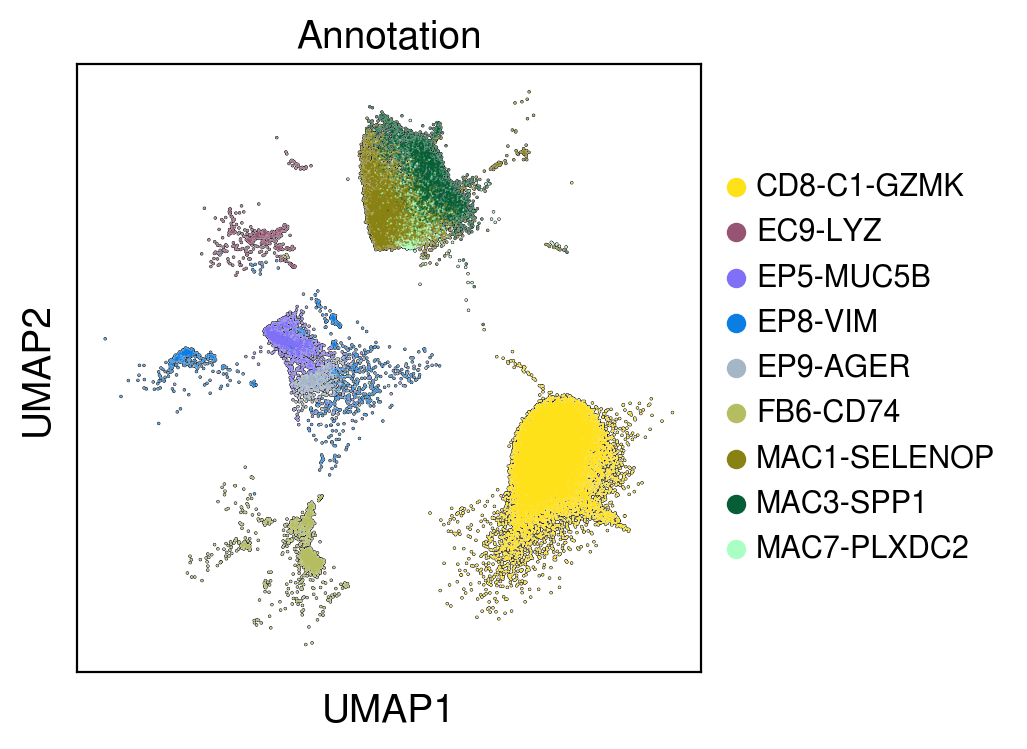

In [90]:
rcParams['figure.figsize'] = (4,4)
sc.pl.umap(NORA_post, color=['Annotation'], edgecolor='none', size=2, show=True, linewidths=10,legend_fontsize=11,add_outline = True, palette=cluster_col_dic)

## Analysis of Epithelial cells

In [91]:
EPI = sc.read("/home/sujin/NORA_EPI_FINAL.h5ad")
EPI

AnnData object with n_obs × n_vars = 34814 × 4133
    obs: 'sample_num', 'cell', 'sample_id', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_types', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'rNumber', 'TKI', 'Response', 'Matched', 'Type', 'Stage', 'EGFR_mutation', 'visible_tumor', 'MPR_type', 'TKI_MPR', 'T-stage', 'predicted.annotation.l2.score', 'predicted.annotation.l2', 'mapping.score', 'basic annotation', 'leiden', 'Merge annotation'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Merge annotation_colors', 'harmony', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'paga', 'pca', 'rank

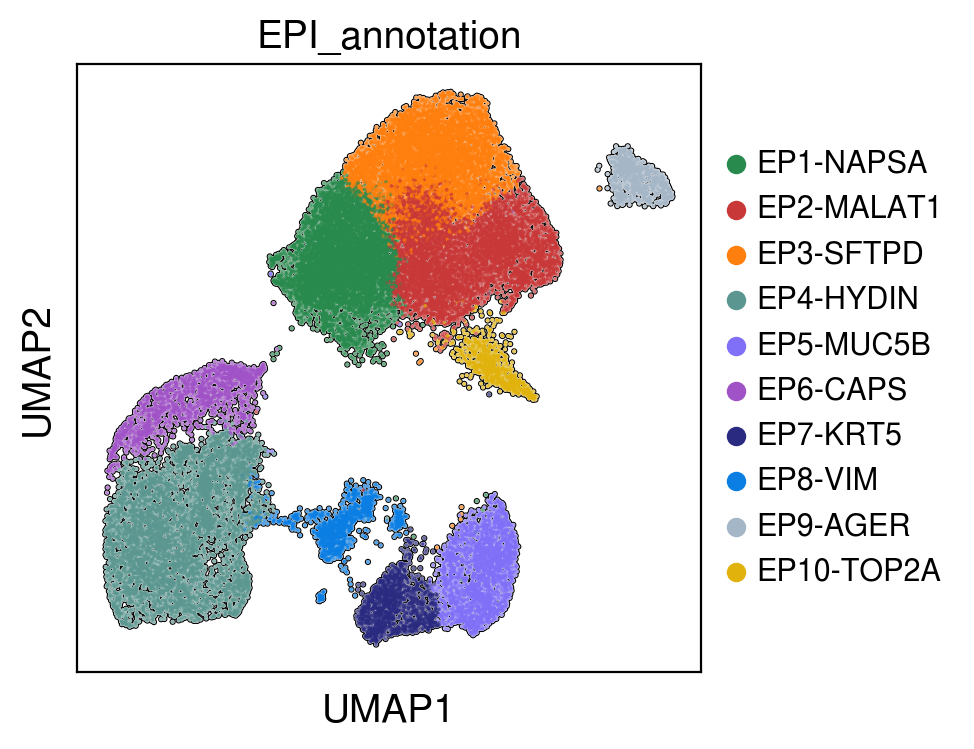

In [109]:
rcParams['figure.figsize'] = (4,4)
sc.pl.umap(EPI, color=['EPI_annotation'], edgecolor='none', size=7, show=True, linewidths=10,legend_fontsize=11,add_outline = True, palette=cluster_col_dic)

In [275]:
Groups_tab = pd.crosstab(index=EPI.obs['TKI'],columns=EPI.obs['EPI_annotation'], margins=True)
Prop_cluster_Tab = Groups_tab.drop(columns="All")
Prop_cluster_Tab = Prop_cluster_Tab.apply(lambda r: r/r.sum(), axis=1).drop(index="All")
Prop_cluster_Tab = Prop_cluster_Tab.loc[['Pre','Post'],:]
Prop_cluster_Tab

EPI_annotation,EP1-NAPSA,EP2-MALAT1,EP3-SFTPD,EP4-HYDIN,EP5-MUC5B,EP6-CAPS,EP7-KRT5,EP8-VIM,EP9-AGER,EP10-TOP2A
TKI,,,,,,,,,,
Pre,0.243003,0.219912,0.209515,0.156259,0.049568,0.037841,0.028471,0.018376,0.009490,0.027565
Post,0.183241,0.162170,0.169449,0.185212,0.090307,0.053856,0.048273,0.053527,0.036834,0.017131


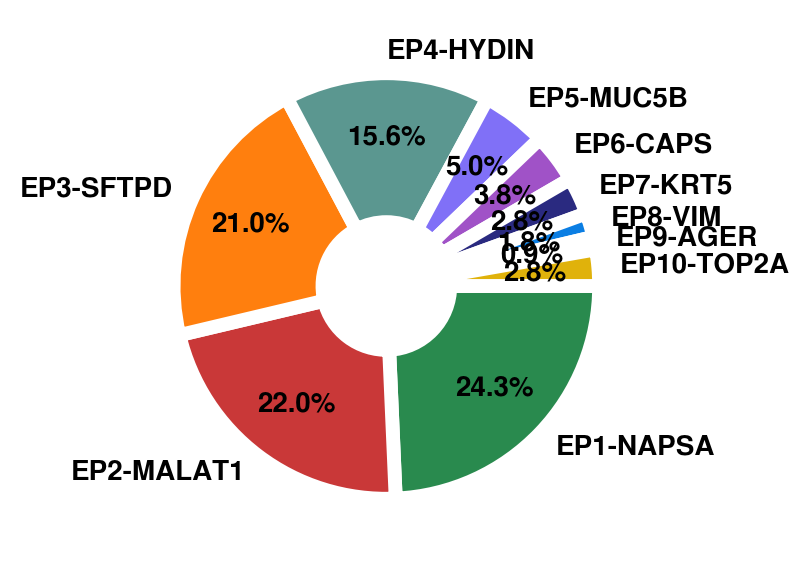

In [276]:
## PRE - basic cluster proportion
ratio = Prop_cluster_Tab.iloc[0].to_list()
labels = Prop_cluster_Tab.columns.to_list()
colors = ['#298a4e','#c93838','#ff7f0e','#5B9790','#8070F7','#a052c7','#2a2a80','#0b7ee3','#a5b6c7','#e0b20b']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', pctdistance=0.7, startangle=360, counterclock=False, colors=colors, wedgeprops=wedgeprops,textprops={'fontweight':'bold','fontsize': 10})
plt.show()

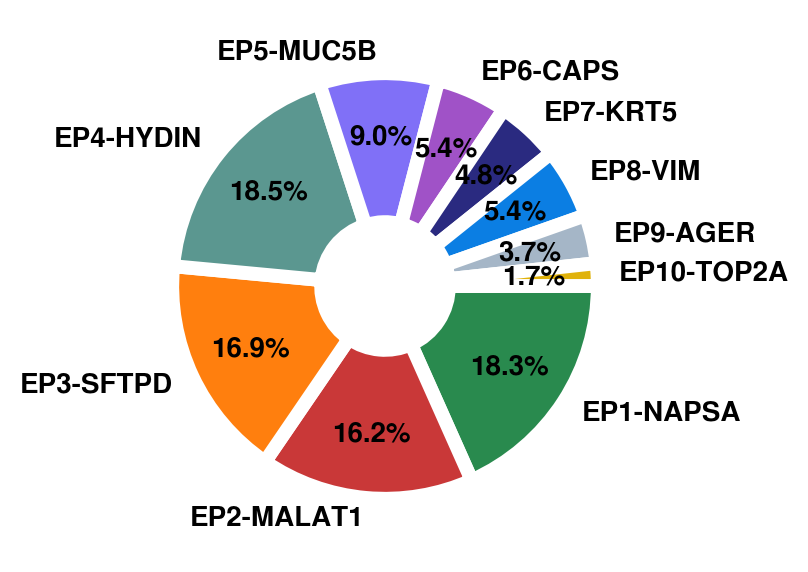

In [277]:
## POST - Epithelial cell cluster proportion
ratio = Prop_cluster_Tab.iloc[1].to_list()
labels = Prop_cluster_Tab.columns.to_list()
colors = ['#298a4e','#c93838','#ff7f0e','#5B9790','#8070F7','#a052c7','#2a2a80','#0b7ee3','#a5b6c7','#e0b20b']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', pctdistance=0.7, startangle=360, counterclock=False, colors=colors, wedgeprops=wedgeprops,textprops={'fontweight':'bold','fontsize': 10})
plt.show()

### signature scoring

In [112]:
YT = ['YAP1', 'TAZ', 'TEAD1', 'TEAD2','TEAD3', 'TEAD4', 'MST1', 'STK3', 'LATS1','LATS2']
Wnt = ['APC','AXIN1','CAV1','CSNK1G1','CTNNB1','CUL3','DVL1','DVL2','DVL3','FZD5','GSK3A','GSK3B','KLHL12','LRP6','NKD2','PI4K2A','PIP5K1B','PPP2R5A','RANBP3','WNT3A']
TGFB = ['ACVR1','ACVR1B','ACVR1C','ACVR2A','ACVR2B','ACVRL1','AMHR2','ATF2','BAMBI','BMP1','BMP10','BMP15','BMP2','BMP3','BMP4','BMP5','BMP6','BMP7','BMP8A','BMP8B','BMPR1A','BMPR1B','BMPR2','CITED1','CITED2','CREBBP','DCP1B','EP300','FKBP1A','FOSL1','FOXH1','GDF1','GDF10','GDF11','GDF15','GDF2','GDF3','GDF5','GDF6','GDF7','GDF9','GDNF','HRAS','INHBA','INHBB','INHBC','INHBE','JUN','JUNB','JUND','LEFTY1','LEFTY2','MAP3K7','MAP3K7CL','MAPK1','MAPK10','MAPK11','MAPK12','MAPK13','MAPK14','MAPK3','MAPK8','MAPK9','MSTN','NODAL','NRAS','RRAS','SKI','SKIL','SMAD1','SMAD2','SMAD3','SMAD4','SMAD6','SMAD7','SMAD9','SMURF1','SMURF2','SNIP1','TAB1','TGFB2','TGFB3','TGFBR1','TGFBR2','TLL1','TLL2','ZFYVE9']
Hippo = ['AMOT','AMOTL1','AMOTL2','CASP3','DCHS1','DVL2','FAT4','LATS1','LATS2','MOB1A','MOB1B','NPHP4','SAV1','STK3','STK4','TEAD1','TEAD2','TEAD3','TEAD4','TJP1','TJP2','WWC1','WWTR1','YAP1','YWHAB','YWHAE']
Notch = ['ADAM17','APH1A','CREBBP','CTBP1','CTBP2','DLL1','DLL3','DLL4','DTX1','DTX2','DTX3','DTX3L','DTX4','DVL1','DVL2','DVL3','EP300','HDAC1','HDAC2','HES1']
Angiogenesis = pd.read_csv("/home/sujin/CancerSea/Angiogenesis.txt", sep = "\t")['GeneName'].to_list()
Apoptosis = pd.read_csv("/home/sujin/CancerSea/Apoptosis.txt", sep = "\t")['GeneName'].to_list()
Cell_Cycle = pd.read_csv("/home/sujin/CancerSea/Cell_Cycle.txt", sep = "\t")['GeneName'].to_list()
Differentiation = pd.read_csv("/home/sujin/CancerSea/Differentiation.txt", sep = "\t")['GeneName'].to_list()
DNA_damage = pd.read_csv("/home/sujin/CancerSea/DNA_damage.txt", sep = "\t")['GeneName'].to_list()
DNA_repair = pd.read_csv("/home/sujin/CancerSea/DNA_repair.txt", sep = "\t")['GeneName'].to_list()
EMT = pd.read_csv("/home/sujin/CancerSea/EMT.txt", sep = "\t")['GeneName'].to_list()
Hypoxia = pd.read_csv("/home/sujin/CancerSea/Hypoxia.txt", sep = "\t")['GeneName'].to_list()
Inflammation = pd.read_csv("/home/sujin/CancerSea/Inflammation.txt", sep = "\t")['GeneName'].to_list()
Invasion = pd.read_csv("/home/sujin/CancerSea/Invasion.txt", sep = "\t")['GeneName'].to_list()
Metastasis = pd.read_csv("/home/sujin/CancerSea/Metastasis.txt", sep = "\t")['GeneName'].to_list()
Proliferation = pd.read_csv("/home/sujin/CancerSea/Proliferation.txt", sep = "\t")['GeneName'].to_list()
Quiescence = pd.read_csv("/home/sujin/CancerSea/Quiescence.txt", sep = "\t")['GeneName'].to_list()
Stemness = pd.read_csv("/home/sujin/CancerSea/Stemness.txt", sep = "\t")['GeneName'].to_list()

In [ ]:
geneset_list = [YT, Wnt, TGFB, Hippo, Notch, Angiogenesis, Apoptosis, Cell_Cycle, Differentiation, DNA_damage, DNA_repair, EMT, Hypoxia, Inflammation, Invasion, Metastasis, Proliferation, Quiescence, Stemness]
for geneset in geneset_list:
    sc.tl.score_genes(EPI, geneset, ctrl_size=50, gene_pool=None, n_bins=25, score_name=str(geneset)+"_score", random_state=0, copy=False, use_raw=None)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_EPI_annotation']`


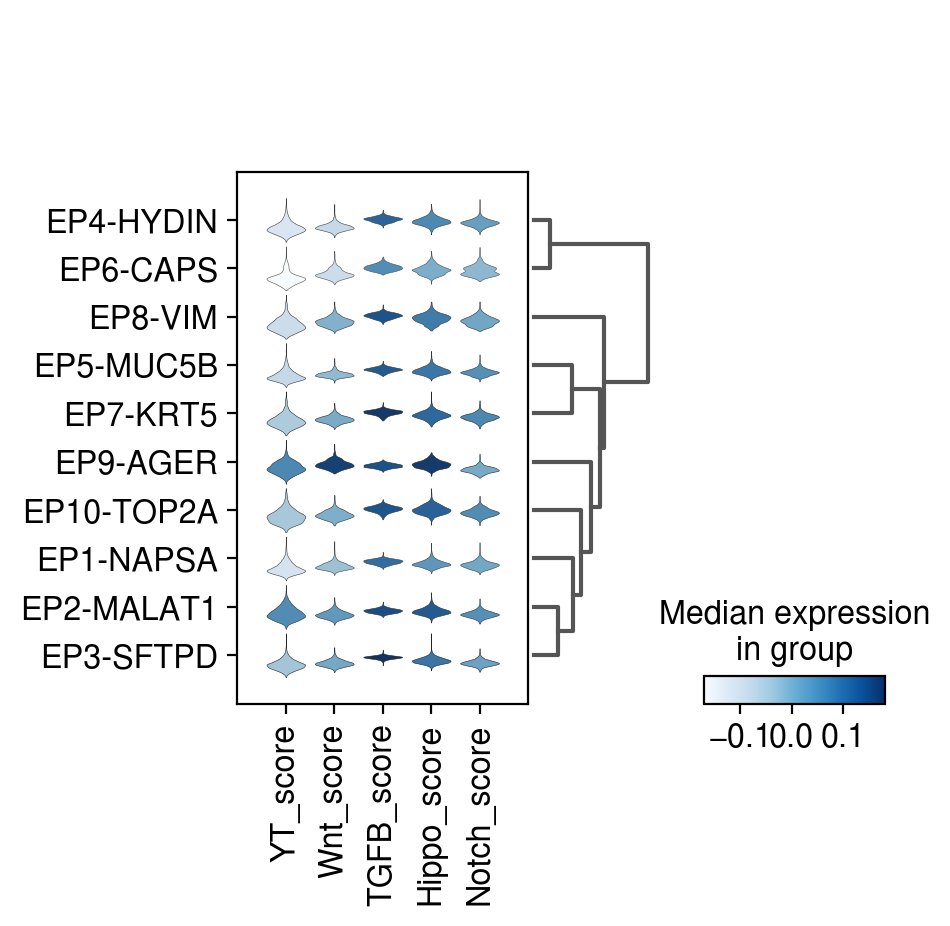

In [129]:
sc.pl.stacked_violin(EPI,['YT_score', 'Wnt_score', 'TGFB_score', 'Hippo_score', 'Notch_score'], groupby='EPI_annotation', dendrogram=True)

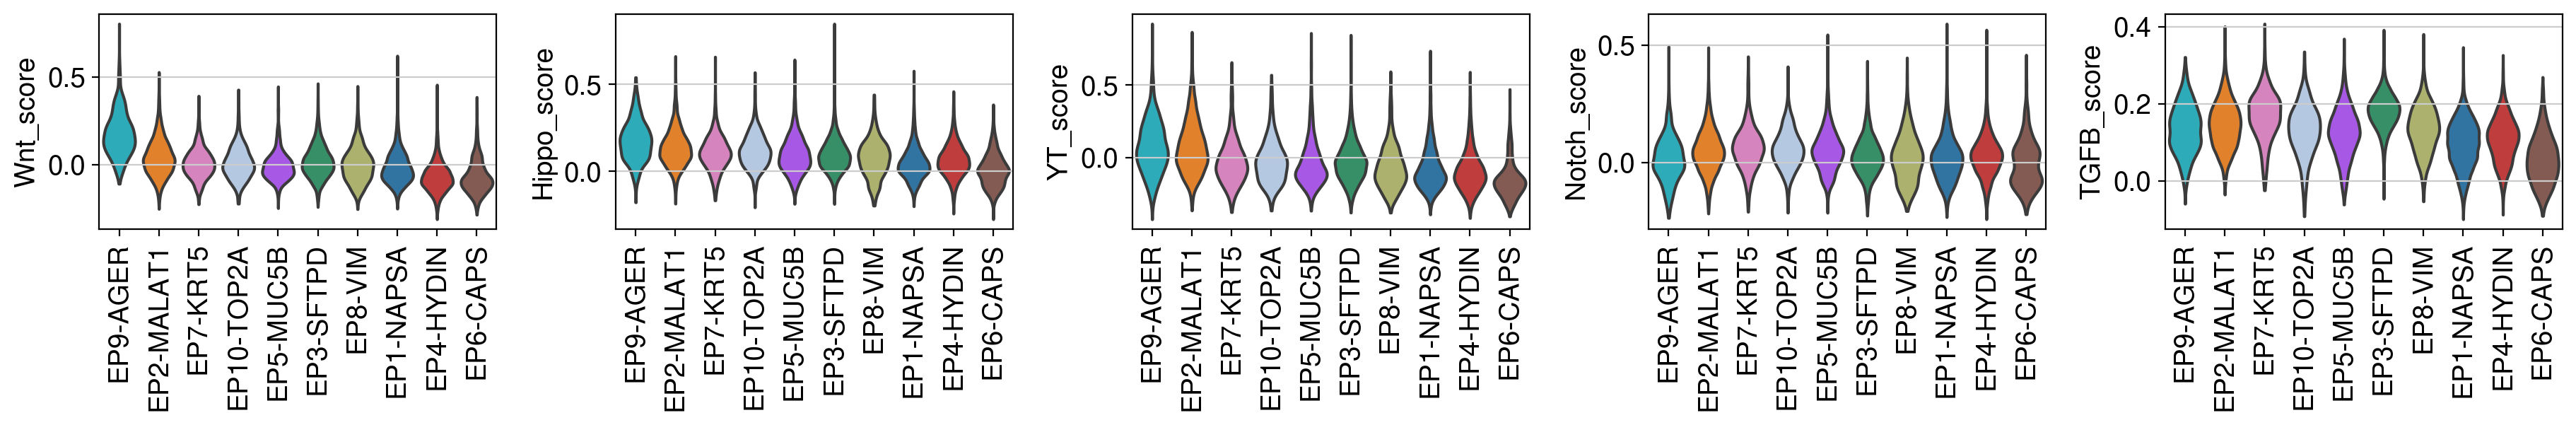

In [135]:
rcParams['figure.figsize'] = (4,2)
sc.pl.violin(EPI, ['Wnt_score', 'Hippo_score', 'YT_score','Notch_score', 'TGFB_score'], groupby='EPI_annotation', log=False, use_raw=None, 
             stripplot=True, jitter=True, size=0, layer=None, scale='width', order=['EP9-AGER','EP2-MALAT1','EP7-KRT5','EP10-TOP2A','EP5-MUC5B','EP3-SFTPD','EP8-VIM','EP1-NAPSA','EP4-HYDIN','EP6-CAPS'],
             multi_panel=None, xlabel='', ylabel=None, rotation=90, show=None, save=None, ax=None)

In [177]:
# Average score
score_df = EPI.obs[['EPI_annotation','Wnt_score', 'Hippo_score', 'YT_score', 'Notch_score', 'TGFB_score', 'Angiogenesis_score', 'Apoptosis_score', 'Cell_Cycle_score', 'Differentiation_score', 'DNA_damage_score', 'DNA_repair_score', 'EMT_score', 'Hypoxia_score', 'Inflammation_score', 'Invasion_score', 'Metastasis_score', 'Proliferation_score', 'Quiescence_score', 'Stemness_score']]
score_df = score_df.groupby('EPI_annotation')[['Wnt_score', 'Hippo_score', 'YT_score', 'Notch_score', 'TGFB_score', 'Angiogenesis_score', 'Apoptosis_score', 'Cell_Cycle_score', 'Differentiation_score', 'DNA_damage_score', 'DNA_repair_score', 'EMT_score', 'Hypoxia_score', 'Inflammation_score', 'Invasion_score', 'Metastasis_score', 'Proliferation_score', 'Quiescence_score', 'Stemness_score']].agg(['mean']).reset_index()
score_df.index = score_df['EPI_annotation']
score_df = score_df.drop(['EPI_annotation'],axis=1)
name_list = []
for name in score_df.columns:
    name_list.append(name[0])
score_df.columns = name_list

### 0-1 normalization
cols = ['Wnt_score', 'Hippo_score', 'YT_score', 'Notch_score', 'TGFB_score', 'Angiogenesis_score', 'Apoptosis_score', 'Cell_Cycle_score', 'Differentiation_score', 'DNA_damage_score', 'DNA_repair_score', 'EMT_score', 'Hypoxia_score', 'Inflammation_score', 'Invasion_score', 'Metastasis_score', 'Proliferation_score', 'Quiescence_score', 'Stemness_score']
score_df[cols] = (score_df[cols]-score_df[cols].min())/(score_df[cols].max()-score_df[cols].min())

### order
cluster_ord = ['EP9-AGER', 'EP2-MALAT1', 'EP7-KRT5', 'EP10-TOP2A', 'EP5-MUC5B', 'EP3-SFTPD', 'EP8-VIM', 'EP1-NAPSA', 'EP4-HYDIN', 'EP6-CAPS']
cluster_ord.reverse()
score_df = score_df.loc[cluster_ord]
score_df = score_df[['Wnt_score', 'Hippo_score','YT_score', 'Notch_score', 'TGFB_score', 'Angiogenesis_score', 'Apoptosis_score','Differentiation_score', 'Hypoxia_score', 'Inflammation_score', 'Metastasis_score', 
                      'Quiescence_score', 'Stemness_score','DNA_damage_score','Proliferation_score','Cell_Cycle_score',  'DNA_repair_score', 'EMT_score', 'Invasion_score']]
passway_ord = ['Wnt', 'Hippo', 'YAP/TAZ', 'Notch', 'TGFB','Angiogenesis', 'Apoptosis', 'Differentiation','Hypoxia', 'Inflammation','Metastasis', 'Quiescence','Stemness','DNA_damage',  'Proliferation','Cell_Cycle', 'DNA_repair', 'EMT','Invasion']
score_df.columns = passway_ord
passway_ord.reverse()
score_df

,Wnt,Hippo,YAP/TAZ,Notch,TGFB,Angiogenesis,Apoptosis,Differentiation,Hypoxia,Inflammation,Metastasis,Quiescence,Stemness,DNA_damage,Proliferation,Cell_Cycle,DNA_repair,EMT,Invasion
EPI_annotation,,,,,,,,,,,,,,,,,,,
EP6-CAPS,0.004713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006907,0.148509,0.318926,0.114097,0.072760
EP4-HYDIN,0.000000,0.332719,0.272854,0.483254,0.412553,0.034960,0.193852,0.414698,0.081307,0.142435,0.287250,0.265725,0.375144,0.303764,0.000000,0.000000,0.378372,0.000000,0.000000
EP1-NAPSA,0.229521,0.228481,0.357500,0.347468,0.319459,0.173857,0.479270,0.262259,0.334791,0.365835,0.338006,0.363992,0.293205,0.279862,0.179000,0.136216,0.243727,0.287569,0.266276
EP8-VIM,0.283698,0.392062,0.380317,0.345538,0.627736,0.920116,0.676606,0.711565,0.764249,0.630183,0.860527,0.757512,0.587519,0.434138,0.464639,0.112487,0.181180,1.000000,1.000000
EP3-SFTPD,0.361395,0.507826,0.560440,0.484638,1.000000,0.359804,0.600780,0.703027,0.818212,0.733034,0.527022,0.781749,0.716273,0.624702,0.313695,0.100385,0.236818,0.268498,0.275917
EP5-MUC5B,0.257443,0.525162,0.495798,0.852677,0.545168,0.462734,0.453452,0.520117,0.602241,0.701175,0.623620,0.902132,0.688070,0.310025,0.237686,0.062369,0.000000,0.172219,0.129877
EP10-TOP2A,0.331168,0.658379,0.558408,0.966578,0.595297,0.363894,0.741860,0.699105,0.392799,0.493812,0.760174,0.561538,0.679771,1.000000,1.000000,1.000000,1.000000,0.391756,0.527866
EP7-KRT5,0.323305,0.583261,0.544133,1.000000,0.893666,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.875201,0.833055,0.113815,0.265024,0.350367,0.428148
EP2-MALAT1,0.459092,0.751500,1.000000,0.848983,0.715580,0.425012,0.719784,0.672196,0.365101,0.512815,0.575193,0.657443,0.695481,0.431313,0.172449,0.041059,0.202611,0.276720,0.228987


Text(109.72222222222221, 0.5, '')

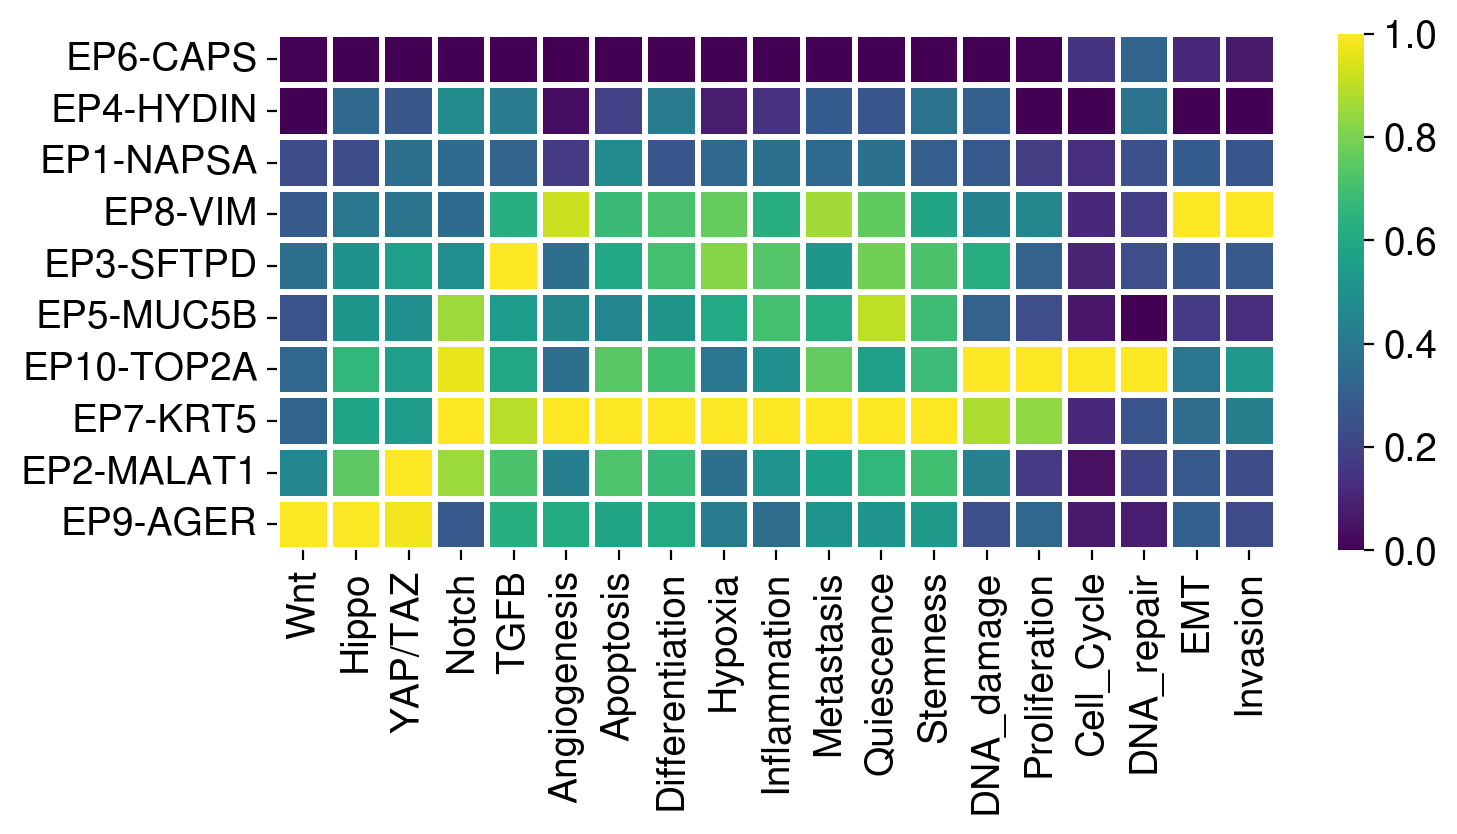

In [164]:
sc.settings.set_figure_params(dpi=100)
rcParams['figure.figsize'] = (8,3.4)

ax = sns.heatmap(test, annot=False, cmap="viridis", cbar=True,linewidths=2, linecolor='white', fmt='.3')
ax.set_xlabel('')
ax.set_ylabel('')

### post enriched genes

In [ ]:
sc.tl.rank_genes_groups(EC9, 'TKI', key_added = 'rank_TKI', method = 'wilcoxon')
sc.tl.rank_genes_groups(EP8, 'TKI', key_added = 'rank_TKI', method = 'wilcoxon')
sc.tl.rank_genes_groups(EP9, 'TKI', key_added = 'rank_TKI', method = 'wilcoxon')
sc.tl.rank_genes_groups(FB6, 'TKI', key_added = 'rank_TKI', method = 'wilcoxon')
sc.tl.rank_genes_groups(MAC1, 'TKI', key_added = 'rank_TKI', method = 'wilcoxon')

In [ ]:
epi_data = EP5.uns['rank_TKI']
epi_data_df = pd.DataFrame({"names":list(epi_data['names']['Post']),"scores":list(epi_data['scores']['Post']),"pvals":list(epi_data['pvals']['Post']),"pvals_adj":list(epi_data['pvals_adj']['Post']),"logfoldchanges":list(epi_data['logfoldchanges']['Post'])})
ep5_up_sig = epi_data_df[(epi_data_df['pvals_adj'] < 0.05) & (epi_data_df['logfoldchanges'] > 0.5)].reset_index(drop = True)
len(ep5_up_sig)  ## 376

In [ ]:
epi_data = EP8.uns['rank_TKI']
epi_data_df = pd.DataFrame({"names":list(epi_data['names']['Post']),"scores":list(epi_data['scores']['Post']),"pvals":list(epi_data['pvals']['Post']),"pvals_adj":list(epi_data['pvals_adj']['Post']),"logfoldchanges":list(epi_data['logfoldchanges']['Post'])})
ep8_up_sig = epi_data_df[(epi_data_df['pvals_adj'] < 0.05) & (epi_data_df['logfoldchanges'] > 0.5)].reset_index(drop = True)
len(ep8_up_sig) ## 90

In [ ]:
epi_data = EP9.uns['rank_TKI']
epi_data_df = pd.DataFrame({"names":list(epi_data['names']['Post']),"scores":list(epi_data['scores']['Post']),"pvals":list(epi_data['pvals']['Post']),"pvals_adj":list(epi_data['pvals_adj']['Post']),"logfoldchanges":list(epi_data['logfoldchanges']['Post'])})
ep9_up_sig = epi_data_df[(epi_data_df['pvals_adj'] < 0.05) & (epi_data_df['logfoldchanges'] > 0.5)].reset_index(drop = True)
len(ep9_up_sig) ## 1776

In [ ]:
epi_data = EC9.uns['rank_TKI']
epi_data_df = pd.DataFrame({"names":list(epi_data['names']['Post']),"scores":list(epi_data['scores']['Post']),"pvals":list(epi_data['pvals']['Post']),"pvals_adj":list(epi_data['pvals_adj']['Post']),"logfoldchanges":list(epi_data['logfoldchanges']['Post'])})
endo_up_sig = epi_data_df[(epi_data_df['pvals_adj'] < 0.05) & (epi_data_df['logfoldchanges'] > 0.5)].reset_index(drop = True)
len(endo_up_sig) ## 28

In [ ]:
epi_data = FB6.uns['rank_TKI']
epi_data_df = pd.DataFrame({"names":list(epi_data['names']['Post']),"scores":list(epi_data['scores']['Post']),"pvals":list(epi_data['pvals']['Post']),"pvals_adj":list(epi_data['pvals_adj']['Post']),"logfoldchanges":list(epi_data['logfoldchanges']['Post'])})
fb_up_sig = epi_data_df[(epi_data_df['pvals_adj'] < 0.05) & (epi_data_df['logfoldchanges'] > 0.5)].reset_index(drop = True)
len(fb_up_sig) ## 51

In [ ]:
epi_data = MAC1.uns['rank_TKI']
epi_data_df = pd.DataFrame({"names":list(epi_data['names']['Post']),"scores":list(epi_data['scores']['Post']),"pvals":list(epi_data['pvals']['Post']),"pvals_adj":list(epi_data['pvals_adj']['Post']),"logfoldchanges":list(epi_data['logfoldchanges']['Post'])})
mac_up_sig = epi_data_df[(epi_data_df['pvals_adj'] < 0.05) & (epi_data_df['logfoldchanges'] > 0.5)].reset_index(drop = True)
len(mac_up_sig) ## 265

In [ ]:
ep5_post_enr = gp.enrichr(gene_list=list(ep5_up_sig['names']),gene_sets=['KEGG_2021_Human','GO_Biological_Process_2021','WikiPathway_2021_Human','MSigDB_Hallmark_2020'],organism='human', outdir=None, cutoff=0.05)
ec9_post_enr = gp.enrichr(gene_list=list(endo_up_sig['names']),gene_sets=['KEGG_2021_Human','GO_Biological_Process_2021','WikiPathway_2021_Human','MSigDB_Hallmark_2020'],organism='human', outdir=None, cutoff=0.05)
ep8_post_enr = gp.enrichr(gene_list=list(ep8_up_sig['names']),gene_sets=['KEGG_2021_Human','GO_Biological_Process_2021','WikiPathway_2021_Human','MSigDB_Hallmark_2020'],organism='human', outdir=None, cutoff=0.05)
ep9_post_enr = gp.enrichr(gene_list=list(ep9_up_sig['names']),gene_sets=['KEGG_2021_Human','GO_Biological_Process_2021','WikiPathway_2021_Human','MSigDB_Hallmark_2020'],organism='human', outdir=None, cutoff=0.05)
fb6_post_enr = gp.enrichr(gene_list=list(fb_up_sig['names']),gene_sets=['KEGG_2021_Human','GO_Biological_Process_2021','WikiPathway_2021_Human','MSigDB_Hallmark_2020'],organism='human', outdir=None, cutoff=0.05)
mac1_post_enr = gp.enrichr(gene_list=list(mac_up_sig['names']),gene_sets=['KEGG_2021_Human','GO_Biological_Process_2021','WikiPathway_2021_Human','MSigDB_Hallmark_2020'],organism='human', outdir=None, cutoff=0.05)

In [ ]:
test = []
for df in [ep5_post_enr, ec9_post_enr, ep8_post_enr, ep9_post_enr,fb6_post_enr,mac1_post_enr]:
    for i in df.results['Genes']:
        tmp = []
        for j in i.strip().split(";"):
            tmp.append(j)
        test.append(len(tmp))

In [ ]:
ep5_post_enr_sig = ep5_post_enr.results[(ep5_post_enr.results['Adjusted P-value'] < 0.05) & (ep5_post_enr.results['n_genes'] >= 3)].reset_index(drop = True)
ep5_post_enr_sig_top = ep5_post_enr_sig.sort_values(by=['Adjusted P-value'], ascending=True).head(30).reset_index(drop = True)
ep5_post_enr_sig_top

In [ ]:
ep8_post_enr_sig = ep8_post_enr.results[(ep8_post_enr.results['Adjusted P-value'] < 0.05) & (ep8_post_enr.results['n_genes'] >= 3)].reset_index(drop = True)
ep8_post_enr_sig_top = ep8_post_enr_sig.sort_values(by=['Adjusted P-value'], ascending=True).head(30).reset_index(drop = True)
ep8_post_enr_sig_top

In [ ]:
ep9_post_enr_sig = ep9_post_enr.results[(ep9_post_enr.results['Adjusted P-value'] < 0.05) & (ep9_post_enr.results['n_genes'] >= 3)].reset_index(drop = True)
ep9_post_enr_sig_top = ep9_post_enr_sig.sort_values(by=['Adjusted P-value'], ascending=True).head(30).reset_index(drop = True)
ep9_post_enr_sig_top

In [ ]:
fb6_post_enr_sig = fb6_post_enr.results[(fb6_post_enr.results['Adjusted P-value'] < 0.05) & (fb6_post_enr.results['n_genes'] >= 3)].reset_index(drop = True)
fb6_post_enr_sig_top = fb6_post_enr_sig.sort_values(by=['Adjusted P-value'], ascending=True).head(30).reset_index(drop = True)
fb6_post_enr_sig_top

In [ ]:
ec9_post_enr_sig = ec9_post_enr.results[(ec9_post_enr.results['Adjusted P-value'] < 0.05) & (ec9_post_enr.results['n_genes'] >= 3)].reset_index(drop = True)
ec9_post_enr_sig_top = ec9_post_enr_sig.sort_values(by=['Adjusted P-value'], ascending=True).head(30).reset_index(drop = True)
ec9_post_enr_sig_top

In [ ]:
mac1_post_enr_sig = mac1_post_enr.results[(mac1_post_enr.results['Adjusted P-value'] < 0.05) & (mac1_post_enr.results['n_genes'] >= 3)].reset_index(drop = True)
mac1_post_enr_sig_top = mac1_post_enr_sig.sort_values(by=['Adjusted P-value'], ascending=True).head(30).reset_index(drop = True)
mac1_post_enr_sig_top

In [ ]:
ax = gp.barplot(ep5_post_enr_sig_top, figsize=(2,3.5),
                group ='Gene_set',
                color = ['black','#777780','#92929c','#b6b6bf'],
                top_term = 20)

In [ ]:
ax = gp.barplot(ep8_post_enr_sig_top, figsize=(2,3.5),
                group ='Gene_set',
                color = ['black','#777780','#92929c','#b6b6bf'],
                top_term = 20)

In [ ]:
ax = gp.barplot(ep9_post_enr_sig_top, figsize=(2,3.5),
                group ='Gene_set',
                color = ['black','#777780','#92929c','#b6b6bf'],
                top_term = 20)